In [35]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import os

In [36]:
PATHOGENS=["abaumannii", "calbicans", "campylobacter", "ecoli", "efaecium", "enterobacter", "hpylori", "kpneumoniae", "mtuberculosis", "ngonorrhoeae", "paeruginosa", "pfalciparum", "saureus", "smansoni", "spneumoniae"]
PATH_TO_DATA = "../data"
target = 'organism'

In [71]:
COMPOUNDS = {i: [] for i in PATHOGENS}
TASKS = {i: [] for i in PATHOGENS}

# For each pathogen
for pathogen in tqdm.tqdm(PATHOGENS):

    try:

        # Get all tasks
        tasks = os.listdir(f"{PATH_TO_DATA}/{pathogen}_{target}")
        TASKS[pathogen] = tasks

        for task in tasks:
            
            # Get active compounds for each task
            df = pd.read_csv(f"{PATH_TO_DATA}/{pathogen}_{target}/{task}")
            COMPOUNDS[pathogen].extend(df[df[df.columns[-1]] == 1]['inchikey'].tolist())

        # From list to counter
        COMPOUNDS[pathogen] = Counter(COMPOUNDS[pathogen])

    except:
        pass

100%|██████████| 15/15 [00:04<00:00,  3.11it/s]


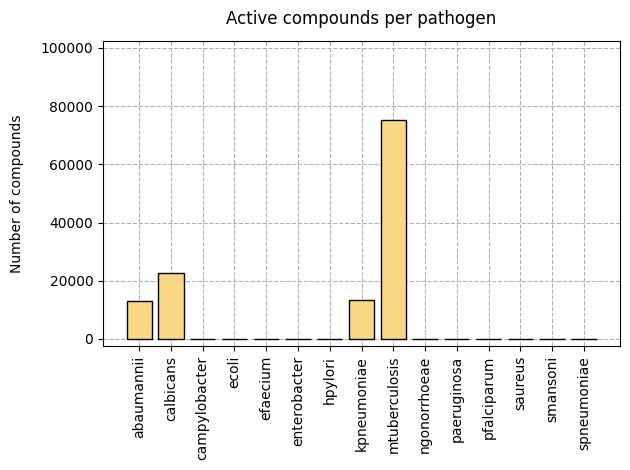

In [72]:
plt.bar([i for i in range(len(PATHOGENS))], [len(COMPOUNDS[i]) for i in PATHOGENS], ec='k', color='#FAD782', zorder=2)
plt.xticks([i for i in range(len(PATHOGENS))], PATHOGENS, rotation=90)

plt.title("Active compounds per pathogen", pad=12)
plt.grid(linestyle='--', zorder=-2)
plt.ylabel("Number of compounds", labelpad=12)
plt.ylim(-2500, 102500)
# plt.yscale('log')
# plt.yticks([1e03, 1e04, 1e05], [r"$10^3$", r"$10^4$", r"$10^5$"])
plt.tight_layout()
plt.savefig("../plots/num_compounds.png", dpi=300)
plt.show()

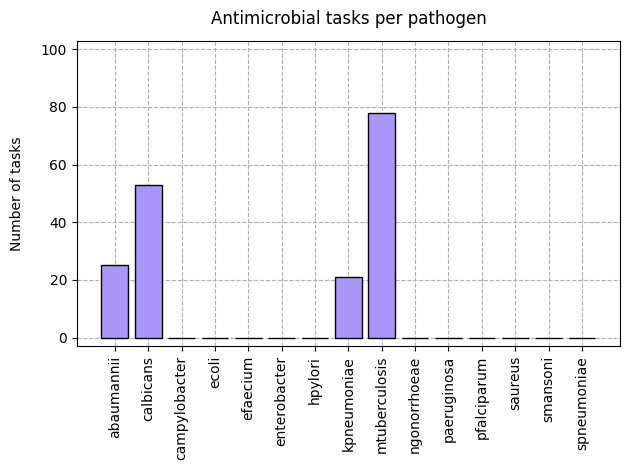

In [76]:
plt.bar([i for i in range(len(PATHOGENS))], [len(TASKS[i]) for i in PATHOGENS], ec='k', color='#AA96FA', zorder=2)
plt.xticks([i for i in range(len(PATHOGENS))], PATHOGENS, rotation=90)

plt.title("Antimicrobial tasks per pathogen", pad=12)
plt.grid(linestyle='--', zorder=-2)
plt.ylabel("Number of tasks", labelpad=12)
plt.ylim(-3, 103)
# plt.yscale('log')
# plt.yticks([1e03, 1e04, 1e05], [r"$10^3$", r"$10^4$", r"$10^5$"])
plt.tight_layout()
plt.savefig("../plots/num_tasks.png", dpi=300)
plt.show()

In [68]:
len(TASKS['abaumannii'])

25